Analysing the data from the file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv(r'C:\Users\pieta\OneDrive\Bureau\Mental Health Model\Mental_health_model\Data\Impact_of_Remote_Work_on_Mental_Health.csv')

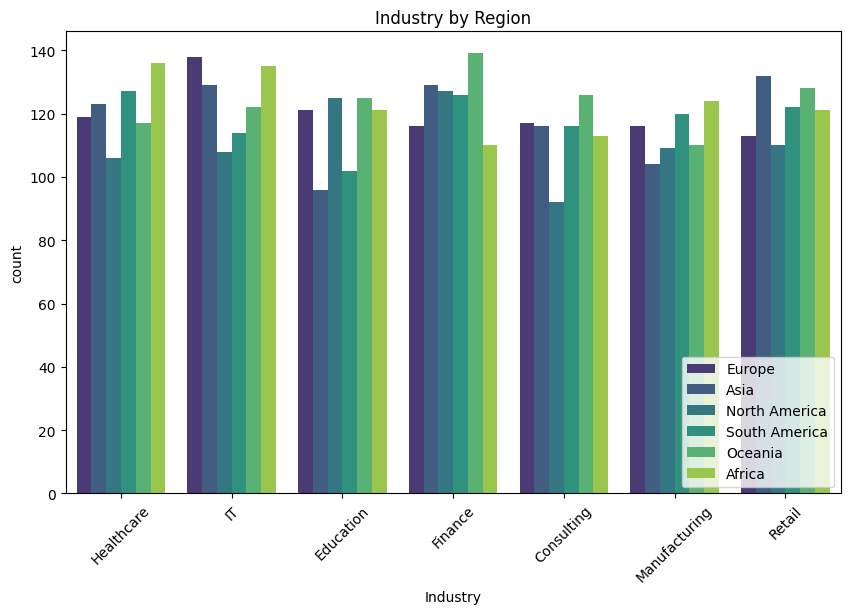

In [12]:
#PLotting Industry by region and company support remote work

plt.figure(figsize=(10, 6))
sns.countplot(x='Industry', hue='Region', data=data,palette='viridis')
plt.title('Industry by Region')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

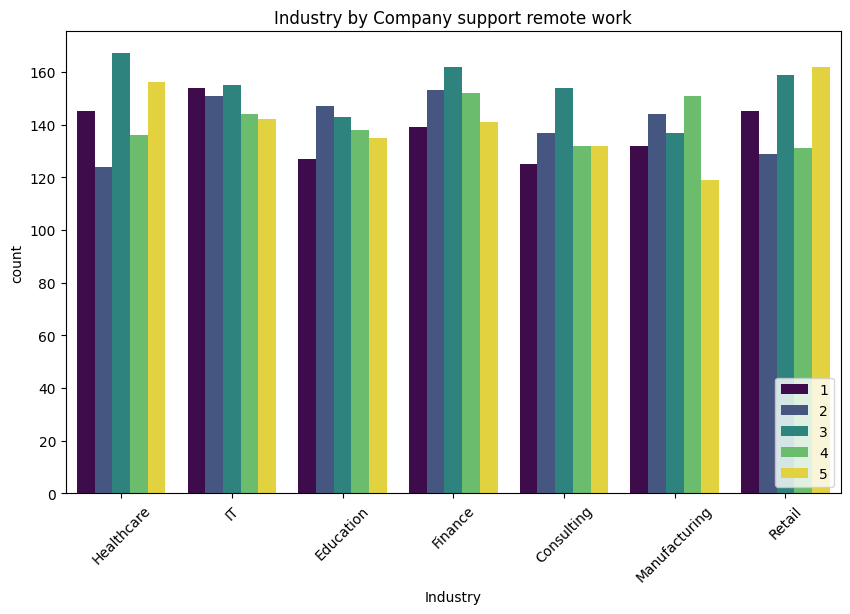

In [15]:
#Plotting industry by compagny support remote work
plt.figure(figsize=(10, 6))
sns.countplot(x='Industry', hue='Company_Support_for_Remote_Work', data=data,palette='viridis')
plt.title('Industry by Company support remote work')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


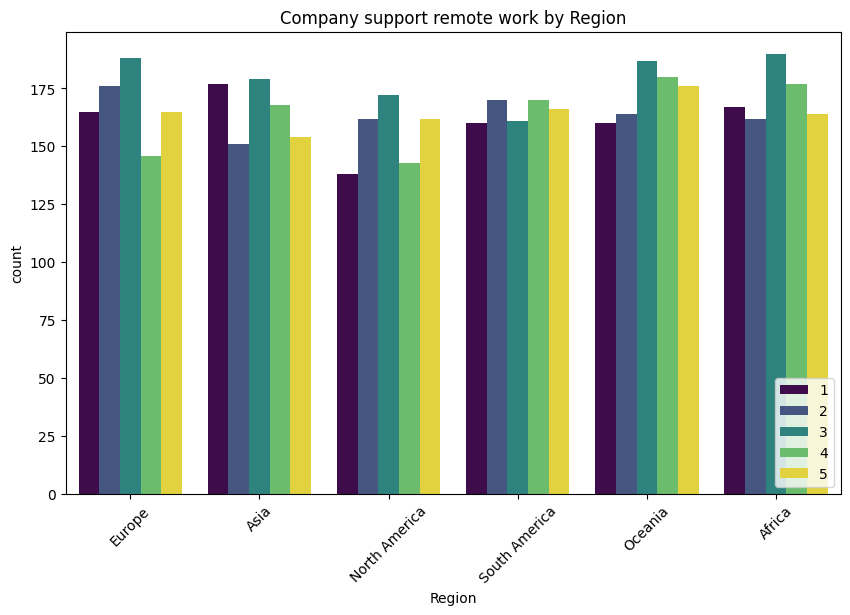

In [17]:
#Plotting company support by region

plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Company_Support_for_Remote_Work', data=data,palette='viridis')
plt.title('Company support remote work by Region')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


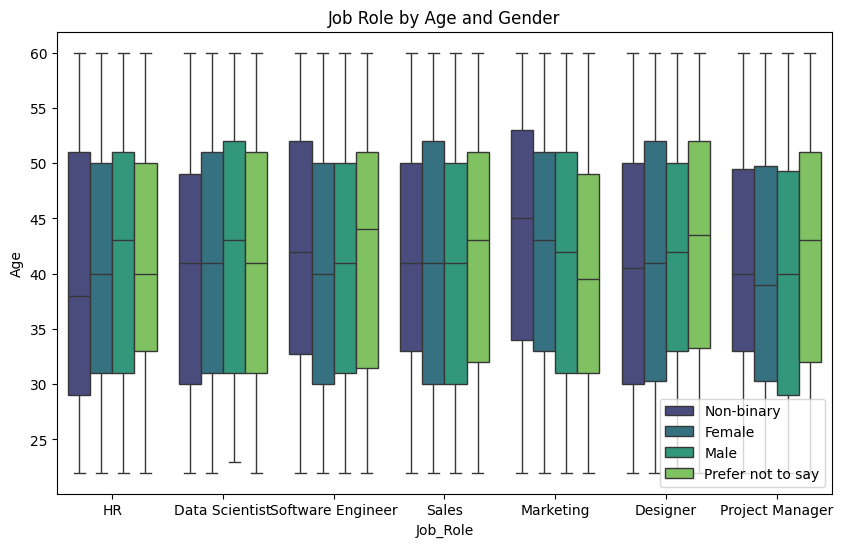

In [9]:
# Plotting Job role by Age and gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Role', y='Age', hue='Gender', data=data, palette='viridis')
plt.title('Job Role by Age and Gender')
plt.legend(loc='lower right')
plt.show()


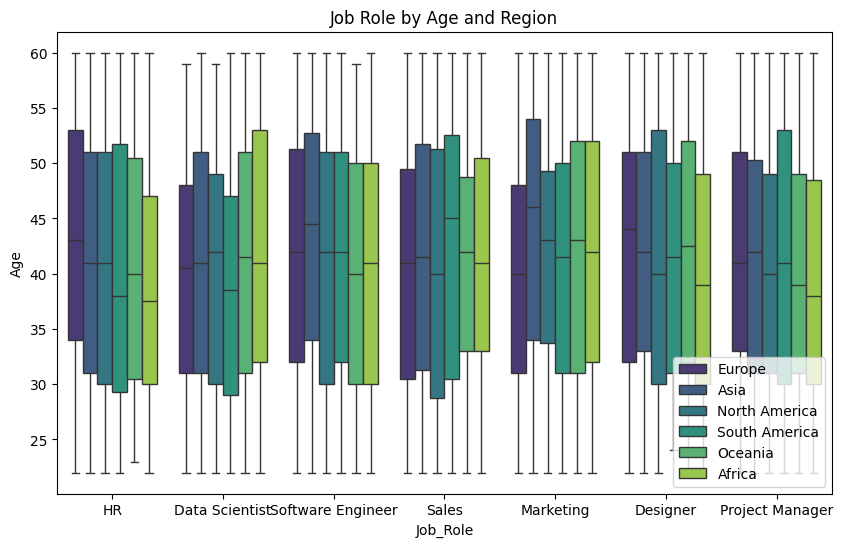

In [18]:
#Plotting Job role by Age and Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Role', y='Age', hue='Region', data=data, palette='viridis')
plt.title('Job Role by Age and Region')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#Plotting job role by stress level and work location
plt.figure(figsize=(10, 6))
sns.countplot(x='Job_Role', y='Stress_Level', hue='Work_Location', data=data, palette='viridis')
plt.title('Job Role by Stress Level and Work Location')
plt.legend(loc='lower right')
plt.show()


TypeError: Cannot pass values for both `x` and `y`.

<Figure size 1000x600 with 0 Axes>